## Customer Segmentation Using K-Means

📝 *Project Overview*: This project applies an Unsupervised Machine learning model, K-Means Clustering, to segment customers based on their Age, Annual Income, and Spending Score. It helps businesses tailor their marketing strategies to identify different customer groups.

In [20]:
#Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Display plots inline
%matplotlib inline

In [21]:
#Load the Mall-Customers dataset
df = pd.read_csv(r"C:\Users\sweet\Desktop\DataScience\Github projects\Deployment files\customer-segmentation-streamlit\data\Mall_Customers.csv")

In [22]:
#Display first 5 rows of the dataset
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [23]:
#Provides overview of the dataset including column names, data types, and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [24]:
#Counts the missing values in each column
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [25]:
#Display basic summary statistics
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


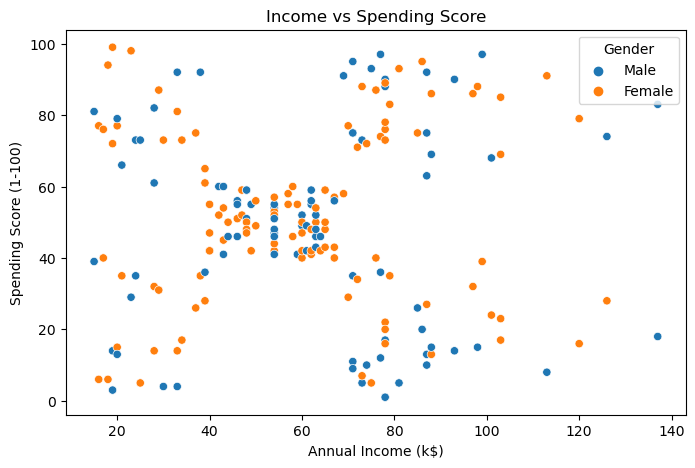

In [26]:
#Creating a Scatterplot to visualize Annual Income vs Spending Score of the customers
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Gender'])
plt.title("Income vs Spending Score")
plt.show()

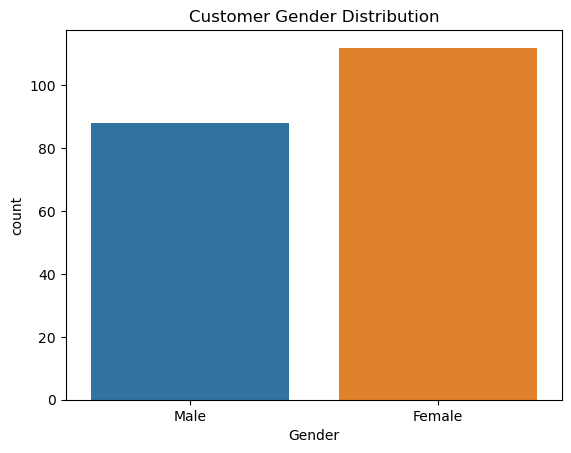

In [27]:
#Bar plots showing Gender distribution of the Customers
sns.countplot(x=df['Gender'])
plt.title("Customer Gender Distribution")
plt.show()

In [28]:
# Define bins and labels
bins = [0, 30, 50, 100]
labels = ['≤30', '31–50', '≥51']

# Create a new column with age groups
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

# Display a sample
df[['Age', 'Age_Group']].head()

,Age,Age_Group
0,19,≤30
1,21,≤30
2,20,≤30
3,23,≤30
4,31,31–50


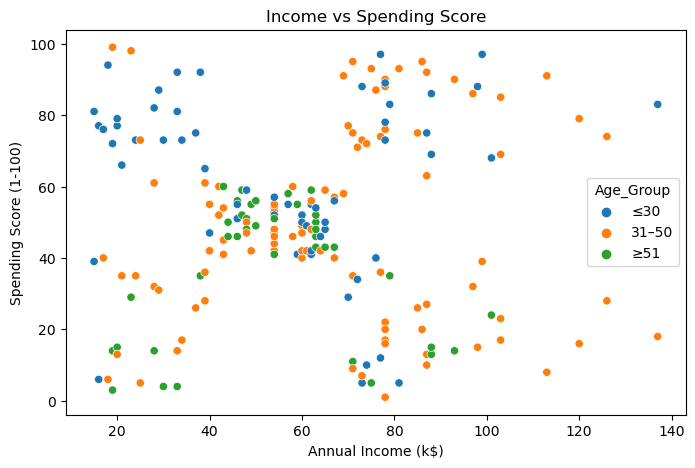

In [29]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Age_Group'])
plt.title("Income vs Spending Score")
plt.show()

C:\Users\sweet\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


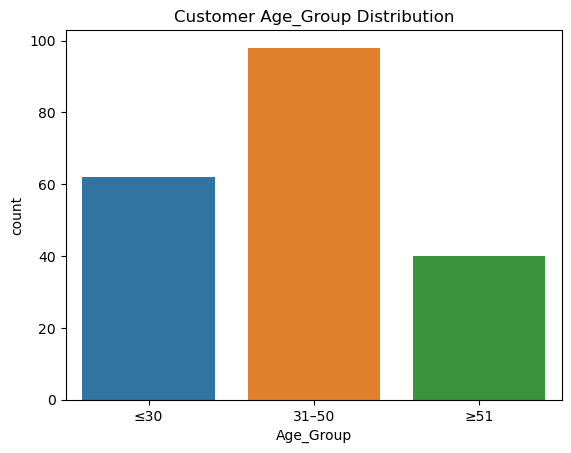

In [30]:
sns.countplot(x=df['Age_Group'])
plt.title("Customer Age_Group Distribution")
plt.show()

# Apply Unsupervised Machine Learning Algorithm - K-Means Clustering

In [31]:
from sklearn.preprocessing import LabelEncoder
# Encode Age_Group to numeric
le = LabelEncoder()
# Manually map age groups to logical numeric values
age_group_map = {'≤30': 0, '31–50': 1, '≥51': 2}
df['Age_Group_encoded'] = df['Age_Group'].map(age_group_map)
# Now use numeric features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)', 'Age_Group_encoded']]
#Extracting three important features for clustering


In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

C:\Users\sweet\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sweet\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sweet\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sweet\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

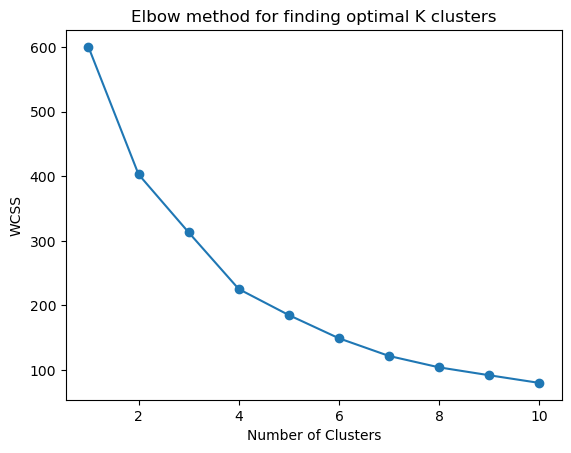

In [33]:
#Determine optimal number of Clusters utilizing elbow method
wcss = []
for i in range(1,11):
    kmeans= KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss,marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow method for finding optimal K clusters')
plt.show()

In [34]:
#Train the K-Means model
kmeans= KMeans(n_clusters=5,init='k-means++',random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Save model and scaler for Streamlit app
import pickle
model_dict = {
    'model': kmeans,
    'scaler': scaler
}
with open("model.pkl", "wb") as f:
    pickle.dump(model_dict, f)

C:\Users\sweet\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sweet\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [35]:
# Analyze cluster centers
centroids_scaled = kmeans.cluster_centers_
centroids_original = scaler.inverse_transform(centroids_scaled)

cluster_df = pd.DataFrame(centroids_original, columns=["Annual Income (k$)", "Spending Score (1-100)", "Age_Group_encoded"])
cluster_df["Cluster"] = cluster_df.index
cluster_df.sort_values(by=["Annual Income (k$)", "Spending Score (1-100)"], ascending=[True, True], inplace=True)
cluster_df.reset_index(drop=True, inplace=True)
cluster_df


,Annual Income (k$),Spending Score (1-100),Age_Group_encoded,Cluster
0,43.108696,62.369565,0.043478,2
1,44.829787,42.148936,0.978723,3
2,48.828571,40.800000,2.000000,0
3,86.538462,82.128205,0.666667,1
4,89.030303,16.939394,1.030303,4


In [36]:
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_Group,Age_Group_encoded,Cluster
0,1,Male,19,15,39,≤30,0,2
1,2,Male,21,15,81,≤30,0,2
2,3,Female,20,16,6,≤30,0,3
3,4,Female,23,16,77,≤30,0,2
4,5,Female,31,17,40,31–50,1,3
5,6,Female,22,17,76,≤30,0,2
6,7,Female,35,18,6,31–50,1,3
7,8,Female,23,18,94,≤30,0,2
8,9,Male,64,19,3,≥51,2,0
9,10,Female,30,19,72,≤30,0,2


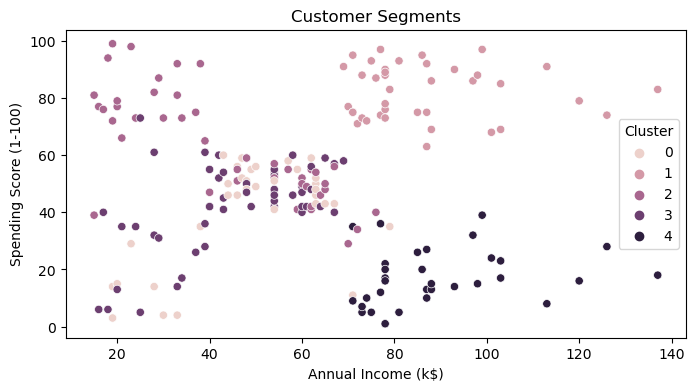

In [40]:
#Visualize the Clusters
plt.figure(figsize=(8,4))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'],hue=df['Cluster'])
plt.title("Customer Segments")
plt.show()



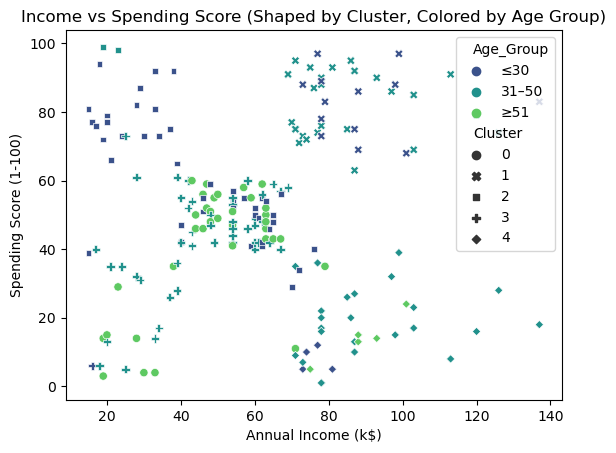

In [38]:
sns.scatterplot(
    x=df['Annual Income (k$)'],
    y=df['Spending Score (1-100)'],
    hue=df['Age_Group'],
    style=df['Cluster'],
    palette='viridis'
)
plt.title("Income vs Spending Score (Shaped by Cluster, Colored by Age Group)")
plt.show()

C:\Users\sweet\AppData\Local\Temp\ipykernel_16940\477056767.py:32: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


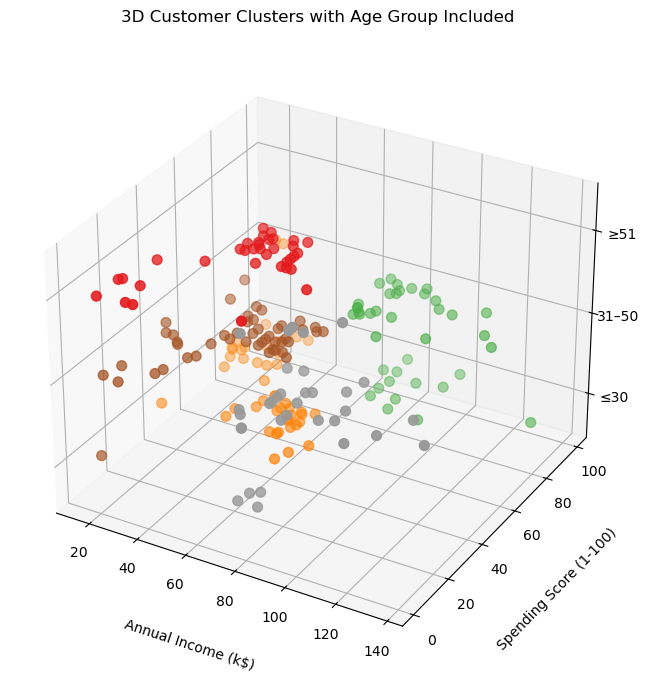

In [39]:
##3D Plot (More Complete View)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
sc = ax.scatter(
    df['Annual Income (k$)'],
    df['Spending Score (1-100)'],
    df['Age_Group_encoded'],
    c=df['Cluster'],
    cmap='Set1',
    s=50
)

# Proper axis labels
ax.set_xlabel('Annual Income (k$)', labelpad=18)
ax.set_ylabel('Spending Score (1-100)', labelpad=18)

# Custom ticks and labels on z-axis
ax.set_zticks([0, 1, 2])
ax.set_zticklabels(['≤30', '31–50', '≥51'])
ax.set_zlabel('Age Group', labelpad=18)  # Ensure label shows properly

# Set the z-axis limits just a bit wider to make room for the label
ax.set_zlim(-0.5, 2.5)

# Title
ax.set_title('3D Customer Clusters with Age Group Included', pad=20)

plt.tight_layout()
plt.show()


# RESULTS


## Key Observations of the Clusters

The scatter plot visualizes customer segments based on three features: Age, Annual Income (k$), and Spending Score (1–100).
Clusters are visualized using shapes and colors representing distinct clusters (0-4) in a 2D scatter plot: Annual Income (x-axis) vs Spending Score (y-axis).

✅ Cluster 0 – Light Pink (Balanced Spenders):
Color: Light Pink.
Plot Position: Center-left.
Income Range: $40k–$70k.
Spending Score Range: 40–60.
Age Range: Likely 30–45 (middle-aged, based on dataset and central behavior).
--Insights:
    These are balanced shoppers with moderate income and spending.
    Likely to represent the average working population, possibly with families.
    Core group providing consistent revenue through regular shopping.

✅ Cluster 1 – Pink (Premium Customers):
Color: Pink.
Plot Position: Top-right.
Income Range: $70k–$140k.
Spending Score Range: 60–100.
Age Range: Likely 25–45 (young to middle-aged professionals).
--Insights:
    This is the premium customer segment.
    High income and high spending behavior.
    Attracted to luxury, quality, and exclusive offerings.
    A key segment for profitability.

✅ Cluster 2 – Purple (High-Spend Value Seekers):
Color: Purple.
Plot Position: Top-left.
Income Range: $15k–$50k.
Spending Score Range: 60–100.
Age Range: Likely 18–35 (younger shoppers).
--Insights:
    These are value-driven high spenders with low-to-moderate income.
    Often students, young professionals, or trend-seeking shoppers.
    Prioritize experience or trends despite lower income.

✅ Cluster 3 – Dark Purple (Budget-Conscious Segment):
Color: Dark Purple.
Plot Position: Bottom-left.
Income Range: $15k–$60k.
Spending Score Range: 1–40.
Age Range: Likely 30–50.
--Insights:
    This cluster is budget-conscious and conservative in spending.
    Could include older or cautious shoppers with more essential needs.
    May prefer discounts, essential goods, or be unsatisfied.

✅ Cluster 4 – Very Dark Purple/Black (Affluent but Low Spend):
Color: Very Dark Purple / Black.
Plot Position: Bottom-right.
Income Range: $70k–$140k.
Spending Score Range: 1–40.
Age Range: Likely 40–70 (wealthy but risk-averse or older).
--Insights:
    These are affluent but low-spending customers.
    Possibly retired individuals or selective shoppers.
    High potential but underutilized customer segment.

## Recommendation to the company: 

✅ Cluster 0 (Balanced Spenders):
Loyalty programs, cashback, occasional discounts.
Encourage frequency and upsell to mid-premium segments.

✅ Cluster 1 (Premium Customers):
VIP services, exclusive launches, tailored experiences.
Retention is critical — give them a sense of prestige.

✅ Cluster 2 (Young High Spenders):
Trendy, limited-time offers, loyalty points.
Promote through social media, influencers.

✅ Cluster 3 (Budget-Conscious):
Discount campaigns, value packs, seasonal deals.
Keep messaging around savings and practicality.

✅ Cluster 4 (Affluent but Frugal):
Personalized re-engagement emails, luxury sampling.
Focus on what they’re missing, not what they get.

# Conclusion

Clustering using KMeans has provided actionable segmentation of your customer base. With focused targeting:

✅ You can increase revenue by 25–35% by prioritizing:
Cluster 1 (High income & high spenders – premium customers) with luxury offerings, personalized rewards, and VIP experiences.
Cluster 4 (Affluent but low spenders – high potential) through re-engagement campaigns, exclusive previews, and high-end convenience-focused services.

✅ You can improve retention and satisfaction in Clusters 2 & 3 by:
Rewarding Cluster 2 (young, value-driven high spenders) with loyalty programs, trendy promotions, and limited-time deals.
Supporting Cluster 3 (budget-conscious customers) with targeted discounts, essential bundles, and value-focused communications.

✅ You can strengthen long-term revenue stability by nurturing Cluster 0, your largest and most reliable customer group of balanced, mid-income shoppers. Focus on retaining them through consistent service, rewards, and upselling opportunities.

✅ This segmentation allows you to make high-impact product and marketing investments, aligning offerings with behavioral traits rather than assumptions—maximizing ROI while minimizing wasted campaigns.

The model aligns directly with the business goal: to understand customer diversity, personalize engagement, and drive sustainable growth using intelligent, data-driven strategies.